<a href="https://colab.research.google.com/github/HarshvardhanParashar/UIDAI_HACKATHON/blob/main/cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biometric


In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
df_bio= pd.read_csv('/content/drive/MyDrive/combined_data.csv')
# Inspect the dataset information
print("\nDataset Info:")
print(df_bio.info())

# Check for missing values
print("\nMissing Values:")
print(df_bio.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df_bio.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB
None

Missing Values:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Duplicate Rows:
94896


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Standardize Column Names
df_bio.rename(columns={'demo_age_17_': 'demo_age_above_17'}, inplace=True)

# 2. Convert Date Column to datetime objects
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y', errors='coerce')

# 3. Initial String Standardization (Title Case & Trim Whitespace)
df_bio['state'] = df_bio['state'].astype(str).str.strip().str.title()
df_bio['district'] = df_bio['district'].astype(str).str.strip().str.title()

# 4. Clean State Names
dnhdd_target = 'Dadra and Nagar Haveli and Daman and Diu'
state_mapping = {
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'Jammu & Kashmir': 'Jammu And Kashmir',
    'Jammu and Kashmir': 'Jammu And Kashmir',
    'West Bengli': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'Chhatisgarh': 'Chhattisgarh',
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',
    'Andaman and Nicobar Islands': 'Andaman And Nicobar Islands',
    'Dadra And Nagar Haveli': dnhdd_target,
    'Dadra & Nagar Haveli': dnhdd_target,
    'Dadra and Nagar Haveli': dnhdd_target,
    'Daman And Diu': dnhdd_target,
    'Daman and Diu': dnhdd_target,
    'Dadra And Nagar Haveli And Daman And Diu': dnhdd_target,
    'Uttaranchal': 'Uttarakhand',
    # Fixing city names found in state column
    'Jaipur': 'Rajasthan',
    'Nagpur': 'Maharashtra',
    'Darbhanga': 'Bihar',
    'Daman & Diu': dnhdd_target,
    'Tamilnadu': 'Tamil Nadu',
    'Madanapalle': 'Andhra Pradesh',
    'Puttenahalli': 'Karnataka',
    'Raja Annamalai Puram': 'Tamil Nadu',
    'Balanagar': 'Telangana',
    '100000': np.nan  # Mark invalid entries as NaN
}

# Apply the state mapping
df_bio['state'] = df_bio['state'].replace(state_mapping)

# Drop rows with invalid states (where state became NaN)
df_bio = df_bio.dropna(subset=['state'])

# 5. Clean District Names
district_mapping = {
    'Hasan': 'Hassan'
}
df_bio['district'] = df_bio['district'].replace(district_mapping)


# Display info to verify cleaning
print(df_bio.info())
print("\nUnique States:", df_bio['state'].unique())
unique_state_count = df_bio['state'].nunique()
print(f"Unique States Count: {unique_state_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB
None

Unique States: ['Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh'
 'Chhattisgarh' 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa'
 'Gujarat' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Ladakh']
Unique States Count: 36


In [ ]:
print("\nChecking for negative values in numerical columns:")

# Columns to check for negative values
numerical_cols = ['pincode', 'bio_age_5_17', 'bio_age_17_']

found_negative = False
for col in numerical_cols:
    if (df_bio[col] < 0).any():
        print(f"  - Column '{col}' contains negative values. Minimum value: {df_bio[col].min()}")
        found_negative = True
    else:
        print(f"  - Column '{col}' does not contain negative values.")

if not found_negative:
    print("No negative values found in the specified numerical columns.")


Checking for negative values in numerical columns:
  - Column 'pincode' does not contain negative values.
  - Column 'bio_age_5_17' does not contain negative values.
  - Column 'bio_age_17_' does not contain negative values.
No negative values found in the specified numerical columns.


In [ ]:
# The dataset is now available in df_bio from the previous step.
# We will use df_bio for inspection.
# Inspect the dataset information
print("\nDataset Info:")
print(df_bio.info())

# Check for missing values
print("\nMissing Values:")
print(df_bio.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df_bio.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB
None

Missing Values:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Duplicate Rows:
95597


In [ ]:
print("\nDropping duplicate rows...")
df_bio.drop_duplicates(inplace=True)

print("\nDuplicate Rows after dropping duplicates:")
print(df_bio.duplicated().sum())


Dropping duplicate rows...

Duplicate Rows after dropping duplicates:
0


Now that the missing values are handled, let's also check the `Dataset Info` and `Duplicate Rows` again to ensure the data is clean after dropping rows.

In [ ]:
print("\nDataset Info after dropping NaN rows:")
print(df_bio.info())

print("\nDuplicate Rows after dropping NaN rows:")
print(df_bio.duplicated().sum())


Dataset Info after dropping NaN rows:
<class 'pandas.core.frame.DataFrame'>
Index: 1765511 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.3+ MB
None

Duplicate Rows after dropping NaN rows:
0


Demographoc


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/combined_demo_data.csv')
# Inspect the dataset information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB
None

Missing Values:
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Duplicate Rows:
473601


In [ ]:
import pandas as pd

# Load the dataset
df_demo = pd.read_csv('/content/drive/MyDrive/combined_demo_data.csv')

# 1. Clean whitespace in state names (removes leading/trailing spaces)
df_demo['state'] = df_demo['state'].str.strip()

# 2. Define a dictionary to map incorrect names to correct state names
state_corrections = {
    # Variations of Odisha
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',
    'odisha': 'Odisha',

    # Variations of West Bengal
    'West Bengli': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'WEST BENGAL': 'West Bengal',
    'west Bengal': 'West Bengal',

    # Variations of UTs and other states
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Chhatisgarh': 'Chhattisgarh',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'andhra pradesh': 'Andhra Pradesh',

    # Fix Cities/Districts appearing as States based on context
    'BALANAGAR': 'Telangana',
    'Jaipur': 'Rajasthan',
    'Madanapalle': 'Andhra Pradesh',
    'Nagpur': 'Maharashtra',
    'Raja Annamalai Puram': 'Tamil Nadu',
    'Darbhanga': 'Bihar',
    'Puttenahalli': 'Karnataka'
}

# 3. Apply the corrections
df_demo['state'] = df_demo['state'].replace(state_corrections)

# 4. Remove invalid rows where state is '100000'
df_demo = df_demo[df_demo['state'] != '100000']

print("Cleaning complete. Unique states:")
print(df_demo['state'].unique())

print("Final List of States & UTs:")
print(df_demo['state'].unique())

print("\nFinal Count of States & UTs:")
print(len(df_demo['state'].unique()))

Cleaning complete. Unique states:
['Karnataka' 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Jammu and Kashmir'
 'Jharkhand' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andaman and Nicobar Islands' 'Andhra Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli and Daman and Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Arunachal Pradesh'
 'Tripura' 'Lakshadweep']
Final List of States & UTs:
['Karnataka' 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Jammu and Kashmir'
 'Jharkhand' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Andaman and Nicobar Islands' 'Andhra Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli and Daman and Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal

In [ ]:
print("\nChecking for negative values in numerical columns:")

# Columns to check for negative values
numerical_cols = ['pincode', 'demo_age_5_17', 'demo_age_17_']

found_negative = False
for col in numerical_cols:
    if (df_demo[col] < 0).any():
        print(f"  - Column '{col}' contains negative values. Minimum value: {df_demo[col].min()}")
        found_negative = True
    else:
        print(f"  - Column '{col}' does not contain negative values.")

if not found_negative:
    print("No negative values found in the specified numerical columns.")


Checking for negative values in numerical columns:
  - Column 'pincode' does not contain negative values.
  - Column 'demo_age_5_17' does not contain negative values.
  - Column 'demo_age_17_' does not contain negative values.
No negative values found in the specified numerical columns.


In [ ]:
#After cleaning
print(df_demo.info())

# Check for missing values
print("\nMissing Values:")
print(df_demo.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df_demo.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2071698 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 110.6+ MB
None

Missing Values:
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Duplicate Rows:
474305


In [ ]:
# Find all rows involved in duplication
# keep=False marks all identical rows as True
duplicates = df_demo[df_demo.duplicated(keep=False)]

# Sort to group identical rows
duplicates_sorted = duplicates.sort_values(by=list(df_demo.columns))

# Display the first 20 rows
print(duplicates_sorted.head(20).to_markdown(index=False))

# Calculate counts
num_redundant = df_demo.duplicated().sum()
print(f"Number of redundant rows to be removed: {num_redundant}")

| date       | state                       | district                 |   pincode |   demo_age_5_17 |   demo_age_17_ |
|:-----------|:----------------------------|:-------------------------|----------:|----------------:|---------------:|
| 01-03-2025 | Andaman and Nicobar Islands | Nicobar                  |    744301 |              16 |            180 |
| 01-03-2025 | Andaman and Nicobar Islands | Nicobar                  |    744301 |              16 |            180 |
| 01-03-2025 | Andaman and Nicobar Islands | North And Middle Andaman |    744202 |              10 |            201 |
| 01-03-2025 | Andaman and Nicobar Islands | North And Middle Andaman |    744202 |              10 |            201 |
| 01-03-2025 | Andhra Pradesh              | Adilabad                 |    504105 |              17 |             61 |
| 01-03-2025 | Andhra Pradesh              | Adilabad                 |    504105 |              17 |             61 |
| 01-03-2025 | Andhra Pradesh              | Adi

In [ ]:
# Remove duplicates, keeping the first occurrence
# This keeps exactly one entry for each set of duplicate rows
df_demo_deduplicated = df_demo.drop_duplicates(keep='first')

# Output results
print(f"Duplicates removed: {len(df_demo) - len(df_demo_deduplicated)}")
print(f"Final row count: {len(df_demo_deduplicated)}")
df_demo=df_demo_deduplicated
df_demo_deduplicated.info()
print("\nDuplicate Rows:")
print(df_demo.duplicated().sum())


Duplicates removed: 474305
Final row count: 1597393
<class 'pandas.core.frame.DataFrame'>
Index: 1597393 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   date           1597393 non-null  object
 1   state          1597393 non-null  object
 2   district       1597393 non-null  object
 3   pincode        1597393 non-null  int64 
 4   demo_age_5_17  1597393 non-null  int64 
 5   demo_age_17_   1597393 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 85.3+ MB

Duplicate Rows:
0


Enrollement


In [ ]:
import pandas as pd

# Load the dataset
df_enroll = pd.read_csv('/content/drive/MyDrive/combined_enroll_data.csv')
# Inspect the dataset information
print("\nDataset Info:")
print(df_enroll.info())

# Check for missing values
print("\nMissing Values:")
print(df_enroll.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df_enroll.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB
None

Missing Values:
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

Duplicate Rows:
22957


In [ ]:
import pandas as pd

# Load the dataframe
df_enroll= pd.read_csv('/content/drive/MyDrive/combined_enroll_data.csv')

# Define the mapping
state_corrections_enroll = {
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',
    'Pondicherry': 'Puducherry',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'WEST BENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'andhra pradesh': 'Andhra Pradesh'
}

# Clean whitespace
df_enroll['state'] = df_enroll['state'].str.strip()

# Apply corrections
df_enroll['state'] = df_enroll['state'].replace(state_corrections_enroll)

# Remove '100000'
df_enroll = df_enroll[df_enroll['state'] != '100000']

print("Final List of States & UTs:")
print(df_enroll['state'].unique())

print("\nFinal Count of States & UTs:")
print(len(df_enroll['state'].unique()))

Final List of States & UTs:
['Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand'
 'Andaman and Nicobar Islands']

Final Count of States & UTs:
36


In [ ]:
# Find all rows involved in duplication
# keep=False marks all identical rows as True
duplicates = df_enroll[df_enroll.duplicated(keep=False)]

# Sort to group identical rows
duplicates_sorted = duplicates.sort_values(by=list(df_enroll.columns))

# Display the first 20 rows
print(duplicates_sorted.head(20).to_markdown(index=False))

# Calculate counts
num_redundant = df_enroll.duplicated().sum()
print(f"Number of redundant rows to be removed: {num_redundant}")

| date       | state                       | district      |   pincode |   age_0_5 |   age_5_17 |   age_18_greater |
|:-----------|:----------------------------|:--------------|----------:|----------:|-----------:|-----------------:|
| 01-09-2025 | Andaman and Nicobar Islands | South Andaman |    744103 |         1 |          0 |                0 |
| 01-09-2025 | Andaman and Nicobar Islands | South Andaman |    744103 |         1 |          0 |                0 |
| 01-09-2025 | Andaman and Nicobar Islands | South Andaman |    744207 |         1 |          0 |                0 |
| 01-09-2025 | Andaman and Nicobar Islands | South Andaman |    744207 |         1 |          0 |                0 |
| 01-09-2025 | Odisha                      | Balangir      |    767066 |         2 |          0 |                0 |
| 01-09-2025 | Odisha                      | Balangir      |    767066 |         2 |          0 |                0 |
| 01-09-2025 | Odisha                      | Baleshwar     |    

In [ ]:
# Remove duplicates, keeping the first occurrence
# This keeps exactly one entry for each set of duplicate rows
df_enroll_deduplicated = df_enroll.drop_duplicates(keep='first')

# Output results
print(f"Duplicates removed: {len(df_enroll) - len(df_enroll_deduplicated)}")
print(f"Final row count: {len(df_enroll_deduplicated)}")
df_enroll=df_enroll_deduplicated
df_enroll_deduplicated.info()
print("\nDuplicate Rows:")
print(df_enroll.duplicated().sum())


Duplicates removed: 23432
Final row count: 982575
<class 'pandas.core.frame.DataFrame'>
Index: 982575 entries, 0 to 1004911
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            982575 non-null  object
 1   state           982575 non-null  object
 2   district        982575 non-null  object
 3   pincode         982575 non-null  int64 
 4   age_0_5         982575 non-null  int64 
 5   age_5_17        982575 non-null  int64 
 6   age_18_greater  982575 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 60.0+ MB

Duplicate Rows:
0


In [ ]:
print("\nChecking for negative values in numerical columns:")

# Columns to check for negative values
numerical_cols = ['pincode', 'age_0_5', 'age_5_17','age_18_greater']

found_negative = False
for col in numerical_cols:
    if (df_enroll[col] < 0).any():
        print(f"  - Column '{col}' contains negative values. Minimum value: {df_enroll[col].min()}")
        found_negative = True
    else:
        print(f"  - Column '{col}' does not contain negative values.")

if not found_negative:
    print("No negative values found in the specified numerical columns.")


Checking for negative values in numerical columns:
  - Column 'pincode' does not contain negative values.
  - Column 'age_0_5' does not contain negative values.
  - Column 'age_5_17' does not contain negative values.
  - Column 'age_18_greater' does not contain negative values.
No negative values found in the specified numerical columns.


In [ ]:

print("\nDataset Info:")
print(df_enroll.info())

# Check for missing values
print("\nMissing Values:")
print(df_enroll.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df_enroll.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 982575 entries, 0 to 1004911
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            982575 non-null  object
 1   state           982575 non-null  object
 2   district        982575 non-null  object
 3   pincode         982575 non-null  int64 
 4   age_0_5         982575 non-null  int64 
 5   age_5_17        982575 non-null  int64 
 6   age_18_greater  982575 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 60.0+ MB
None

Missing Values:
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

Duplicate Rows:
0


In [ ]:
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Clean District Names
df_bio['district'] = df_bio['district'].str.strip()
df_enroll['district'] = df_enroll['district'].str.strip()

# --- PART A: PREPARING THE MASTER DATASET ---

# Calculate total_enrolment in df_enroll
df_enroll['total_enrolment'] = df_enroll['age_0_5'] + df_enroll['age_5_17'] + df_enroll['age_18_greater']

bio_grouped = df_bio.groupby(['state', 'district'])['bio_age_5_17'].sum().reset_index()
bio_grouped.rename(columns={'bio_age_5_17': 'total_updates'}, inplace=True)

enrol_grouped = df_enroll.groupby(['state', 'district'])['total_enrolment'].sum().reset_index()

df_master = pd.merge(enrol_grouped, bio_grouped, on=['state', 'district'], how='inner')

median_enrol = df_master['total_enrolment'].median()
df_master = df_master[df_master['total_enrolment'] > median_enrol].copy()

df_master['update_efficiency'] = df_master['total_updates'] / df_master['total_enrolment']
df_master['log_enrolment'] = np.log1p(df_master['total_enrolment'])

# --- PART B: K-MEANS CLUSTERING ---
X = df_master[['log_enrolment', 'update_efficiency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_master['cluster'] = kmeans.fit_predict(X_scaled)

# --- PART C: CLUSTER NAMING LOGIC ---
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['log_enrolment', 'update_efficiency'])
centroid_df['cluster'] = range(4)
centroid_df = centroid_df.sort_values('log_enrolment', ascending=False)

high_vol_indices = centroid_df.head(2).index
low_vol_indices = centroid_df.tail(2).index

high_vol_clusters = centroid_df.loc[high_vol_indices].sort_values('update_efficiency', ascending=False)
mature_cluster = high_vol_clusters.iloc[0]['cluster']
stress_cluster = high_vol_clusters.iloc[1]['cluster']

low_vol_clusters = centroid_df.loc[low_vol_indices].sort_values('update_efficiency', ascending=False)
dormant_cluster = low_vol_clusters.iloc[0]['cluster']
laggard_cluster = low_vol_clusters.iloc[1]['cluster']

persona_map = {
    mature_cluster: 'Mature/Stable',
    stress_cluster: 'High-Growth Stress',
    dormant_cluster: 'Dormant',
    laggard_cluster: 'Critical Laggards'
}
df_master['Persona'] = df_master['cluster'].map(persona_map)

# --- PART D: INTERACTIVE ALTAIR CHART ---
chart = alt.Chart(df_master).mark_circle(size=60).encode(
    x=alt.X('total_enrolment', scale=alt.Scale(type='log'), title='Total Enrollment (Log Scale)') ,
    y=alt.Y('update_efficiency', title='Update Efficiency'),
    color=alt.Color('Persona', scale=alt.Scale(scheme='set1'), legend=alt.Legend(title="District Persona")),
    tooltip=['district', 'state', 'total_enrolment', 'total_updates', 'update_efficiency', 'Persona']
).properties(
    title='Interactive District Vulnerability Matrix',
    width=700,
    height=500
).interactive()

chart.show()

alt.Chart(...)

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# --- RE-RUN LOGIC TO ISOLATE STRESS ZONE ---
bio_grouped = df_bio.groupby(['state', 'district'])['bio_age_5_17'].sum().reset_index()
bio_grouped.rename(columns={'bio_age_5_17': 'total_updates'}, inplace=True)
enrol_grouped = df_enroll.groupby(['state', 'district'])['total_enrolment'].sum().reset_index()
df_master = pd.merge(enrol_grouped, bio_grouped, on=['state', 'district'], how='inner')

# Filter for significant districts
median_enrol = df_master['total_enrolment'].median()
df_master = df_master[df_master['total_enrolment'] > median_enrol].copy()

# Feature Engineering
df_master['update_efficiency'] = df_master['total_updates'] / df_master['total_enrolment']
df_master['log_enrolment'] = np.log1p(df_master['total_enrolment'])

# Clustering
X = df_master[['log_enrolment', 'update_efficiency']]
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_master['cluster'] = kmeans.fit_predict(scaler.fit_transform(X))

# Naming (Identifying High-Growth Stress)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['log_enrolment', 'update_efficiency'])
centroid_df['cluster'] = range(4)
centroid_df = centroid_df.sort_values('log_enrolment', ascending=False)
high_vol_indices = centroid_df.head(2).index
high_vol_clusters = centroid_df.loc[high_vol_indices].sort_values('update_efficiency', ascending=False)
stress_cluster = high_vol_clusters.iloc[1]['cluster']

df_master['Persona'] = df_master['cluster'].map({stress_cluster: 'High-Growth Stress'})
stress_zone_df = df_master[df_master['Persona'] == 'High-Growth Stress'].copy()

# --- CREATE INTERACTIVE CHART ---
scatter = alt.Chart(stress_zone_df).mark_circle(size=80, color='green').encode(
    x=alt.X('total_enrolment', title='Total Enrollment (Demand)'),
    y=alt.Y('total_updates', title='Total Updates (Supply)'),
    tooltip=['district', 'state', 'total_enrolment', 'total_updates', 'update_efficiency']
).properties(
    title='Interactive Bottleneck Analysis: High-Growth Stress Zone',
    width=800,
    height=600
).interactive()

# Add Trend Line
line = scatter.transform_regression('total_enrolment', 'total_updates').mark_line(color='black', strokeDash=[5,5])

# Layer the scatter plot and the trend line
chart = alt.layer(scatter, line)
chart.show()

alt.LayerChart(...)

<Figure size 1200x700 with 0 Axes>

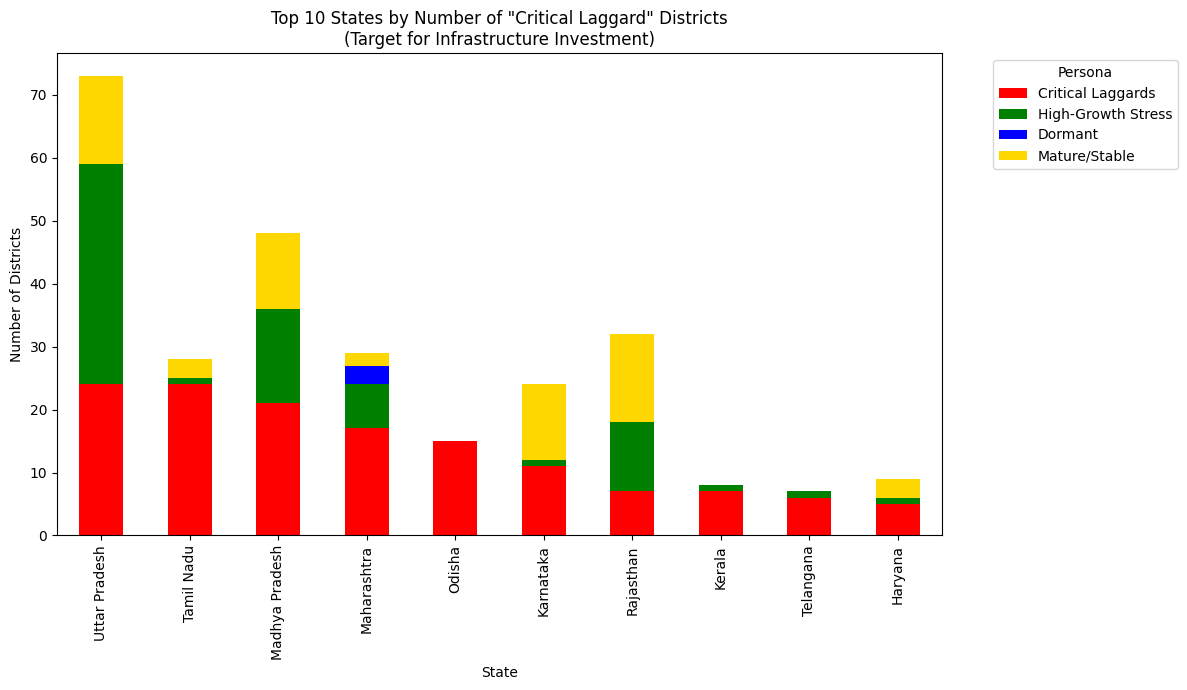

In [ ]:
import matplotlib.pyplot as plt
bio_grouped = df_bio.groupby(['state', 'district'])['bio_age_5_17'].sum().reset_index()
bio_grouped.rename(columns={'bio_age_5_17': 'total_updates'}, inplace=True)
enrol_grouped = df_enroll.groupby(['state', 'district'])['total_enrolment'].sum().reset_index()
df_master = pd.merge(enrol_grouped, bio_grouped, on=['state', 'district'], how='inner')
median_enrol = df_master['total_enrolment'].median()
df_master = df_master[df_master['total_enrolment'] > median_enrol].copy()
df_master['update_efficiency'] = df_master['total_updates'] / df_master['total_enrolment']
df_master['log_enrolment'] = np.log1p(df_master['total_enrolment'])

X = df_master[['log_enrolment', 'update_efficiency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_master['cluster'] = kmeans.fit_predict(X_scaled)

# Naming Logic
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['log_enrolment', 'update_efficiency'])
centroid_df['cluster'] = range(4)
centroid_df = centroid_df.sort_values('log_enrolment', ascending=False)
high_vol_indices = centroid_df.head(2).index
low_vol_indices = centroid_df.tail(2).index
high_vol_clusters = centroid_df.loc[high_vol_indices].sort_values('update_efficiency', ascending=False)
mature_cluster = high_vol_clusters.iloc[0]['cluster']
stress_cluster = high_vol_clusters.iloc[1]['cluster']
low_vol_clusters = centroid_df.loc[low_vol_indices].sort_values('update_efficiency', ascending=False)
dormant_cluster = low_vol_clusters.iloc[0]['cluster']
laggard_cluster = low_vol_clusters.iloc[1]['cluster']

persona_map = {
    mature_cluster: 'Mature/Stable',
    stress_cluster: 'High-Growth Stress',
    dormant_cluster: 'Dormant',
    laggard_cluster: 'Critical Laggards'
}
df_master['Persona'] = df_master['cluster'].map(persona_map)

# --- VISUALIZATION: STATE-WISE ZONE BREAKDOWN WITH CUSTOM COLORS ---
state_persona_counts = df_master.groupby(['state', 'Persona']).size().unstack(fill_value=0)

# Sort by 'Critical Laggards' count
if 'Critical Laggards' in state_persona_counts.columns:
    state_persona_counts['Total'] = state_persona_counts.sum(axis=1)
    state_persona_counts = state_persona_counts.sort_values(by='Critical Laggards', ascending=False).head(10)
    state_persona_counts.drop(columns='Total', inplace=True)

# Define Custom Colors
custom_colors = {
    'Critical Laggards': 'red',
    'Dormant': 'blue',
    'High-Growth Stress': 'green',
    'Mature/Stable': 'gold'
}

# Ensure columns are in a specific order for the plot
desired_order = ['Critical Laggards', 'High-Growth Stress', 'Dormant', 'Mature/Stable']
existing_cols = [c for c in desired_order if c in state_persona_counts.columns]
state_persona_counts = state_persona_counts[existing_cols]

# Map colors to the columns
plot_colors = [custom_colors[c] for c in state_persona_counts.columns]

# Plot
plt.figure(figsize=(12, 7))
state_persona_counts.plot(kind='bar', stacked=True, color=plot_colors, figsize=(12, 7))
plt.title('Top 10 States by Number of "Critical Laggard" Districts\n(Target for Infrastructure Investment)')
plt.ylabel('Number of Districts')
plt.xlabel('State')
plt.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('state_zone_breakdown_custom_colors.png')
plt.show()

<Figure size 1400x800 with 0 Axes>

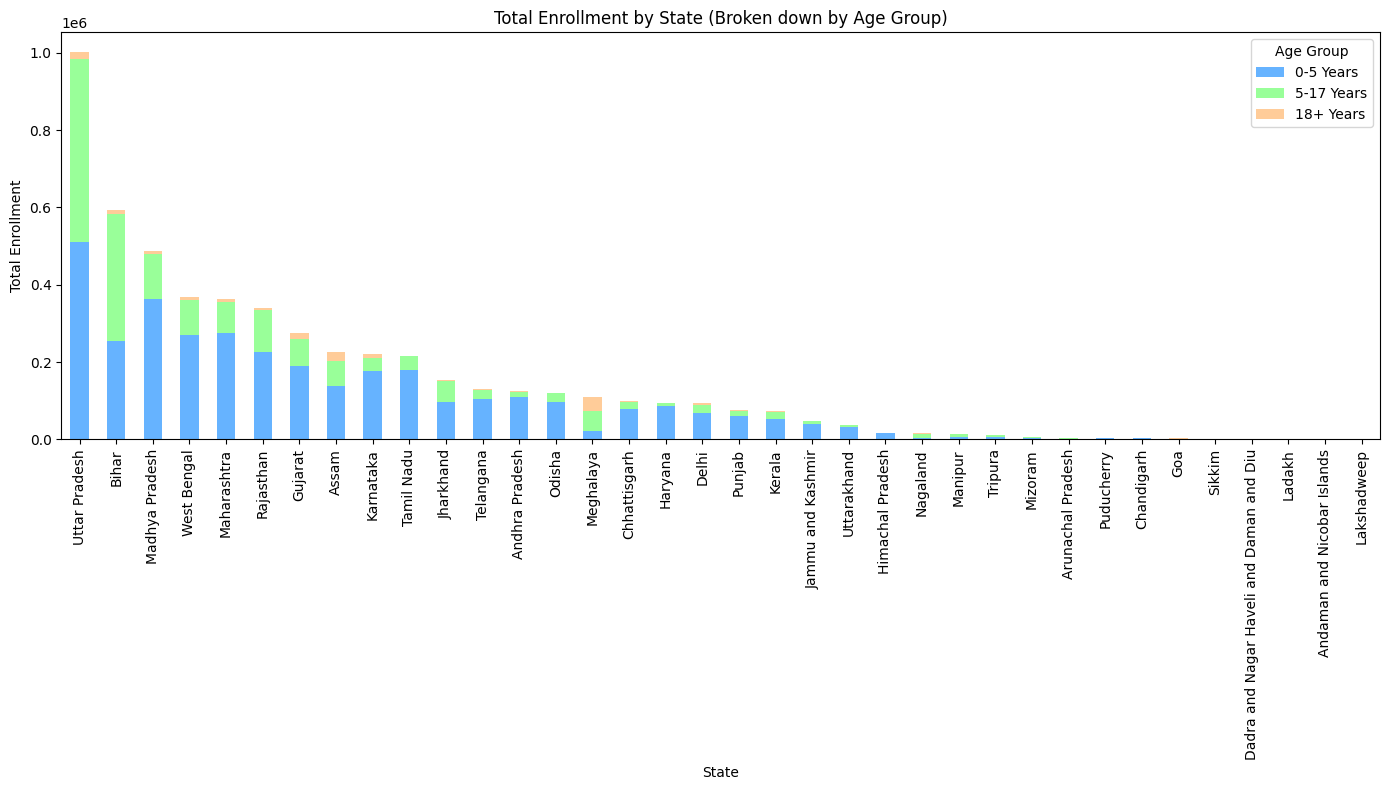

In [ ]:
state_data = df_enroll.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
# Sort by Total Enrollment to make the chart readable (Highest to Lowest)
state_data['Total'] = state_data.sum(axis=1)
state_data = state_data.sort_values(by='Total', ascending=False)
state_data.drop(columns='Total', inplace=True) # Remove Total col for plotting

# 3. Process Data for Districts (Top 20)
# Group by District and sum
district_data = df_enroll.groupby(['district', 'state'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
# Calculate Total for sorting
district_data['Total'] = district_data['age_0_5'] + district_data['age_5_17'] + district_data['age_18_greater']
# Get Top 20
top_districts = district_data.sort_values(by='Total', ascending=False).head(20)
# Create readable labels
top_districts['Label'] = top_districts['district'] + " (" + top_districts['state'] + ")"
top_districts.set_index('Label', inplace=True)
top_districts = top_districts[['age_0_5', 'age_5_17', 'age_18_greater']]

# 4. Plot State-Wise Chart
plt.figure(figsize=(14, 8))
state_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Total Enrollment by State (Broken down by Age Group)')
plt.ylabel('Total Enrollment')
plt.xlabel('State')
plt.legend(['0-5 Years', '5-17 Years', '18+ Years'], title='Age Group')
plt.tight_layout()
plt.savefig('state_wise_enrollment.png')
plt.show()

In [ ]:
df_enroll['district'] = df_enroll['district'].str.strip()

# 2. Compute "Pincode-Level" Activity
# We sum all enrollments for each pincode to see the total service delivered to that locality
pincode_totals = df_enroll.groupby(['state', 'district', 'pincode'])['total_enrolment'].sum().reset_index()

# 3. Calculate Inequality Metrics per District
# We use the Coefficient of Variation (CV) = Std Dev / Mean
district_stats = pincode_totals.groupby(['state', 'district'])['total_enrolment'].agg(['std', 'mean', 'sum']).reset_index()

# Filter for significant districts (ignore tiny ones where data is noisy)
median_activity = district_stats['sum'].median()
significant_districts = district_stats[district_stats['sum'] > median_activity].copy()

# Formula: Inequality Index
# We add +1 to mean to avoid division by zero errors for dormant districts
significant_districts['inequality_index'] = significant_districts['std'] / (significant_districts['mean'] + 1)

# 4. Select Top Offenders (Highest Inequality)
top_unequal = significant_districts.sort_values(by='inequality_index', ascending=False).head(20)

# 5. Create Interactive Chart
chart = alt.Chart(top_unequal).mark_bar().encode(
    x=alt.X('district', sort='-y', title='District'),
    y=alt.Y('inequality_index', title='Inequality Index (Coefficient of Variation)'),
    color=alt.Color('state', legend=alt.Legend(title="State")),
    tooltip=['district', 'state', 'inequality_index', 'sum']
).properties(
    title='Top 20 Districts with Highest Service Inequality (Hidden Pockets of Exclusion)',
    width=800,
    height=500
).interactive()
chart.show()

alt.Chart(...)